In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score  #交叉验证评分
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error #均方根误差
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
# 导入数据，路径中要么用\\或/或者在路径前加r
dataset = pd.read_csv('../data/train_chuli.csv')

In [2]:
# 输出数据预览
print(dataset.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   family_size  Embarked_C  Embarked_Q  Embarked_S  
0            2           0           0           1  
1            2           1           0           0  
2            1           0           0           1  
3            2           0           0           1  
4            1           0           0           1  


In [3]:
from sklearn.model_selection import train_test_split #划分数据集
# 准备训练数据
x = dataset.drop(['Survived'], axis = 1)
y = dataset['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(623, 11) (268, 11) (623,) (268,)


In [4]:
from matplotlib.cm import rainbow 
from sklearn.decomposition import PCA
#决策树
rf_scores = []
model= PCA(n_components=4) 


降维后的数据: [[-4.10323136e+02 -8.61288594e+00  2.01836984e+01 -2.15915222e-01]
 [ 3.94252652e+02  4.80005091e+01  1.89601193e+01  3.97392765e-01]
 [ 6.06502776e+01  1.41562176e+01 -2.93963230e+01  6.33807048e+00]
 ...
 [-1.82116197e+02 -2.62074083e+01  5.33080504e-02 -8.58988117e-01]
 [-1.12214855e+02 -1.57873700e+01  6.21036614e+00  6.83836813e-01]
 [-2.37455714e+02  5.49895649e+00  2.91861140e+01  2.48433566e+00]]
返回具有最大方差的成分: [[-9.99963416e-01  1.17858538e-04 -7.62523379e-05 -3.02745213e-03
   1.57040479e-04 -1.51405829e-05 -7.99568173e-03  1.41899897e-04
  -1.84013750e-05  6.14901013e-05 -4.30887263e-05]
 [-8.07798496e-03 -9.54874699e-03 -1.51082864e-03  2.86808248e-02
   3.69774125e-03  3.78144987e-03  9.99464641e-01  7.47919112e-03
   1.85404183e-03 -7.53137358e-04 -1.10090448e-03]
 [-2.80564976e-03 -1.72272217e-02  3.09567088e-03  9.98608948e-01
  -2.03066882e-02 -1.26157895e-02 -2.84696888e-02 -3.29224777e-02
   2.71674968e-05 -5.25285117e-05  2.53610149e-05]
 [ 1.50111832e-04  6.4

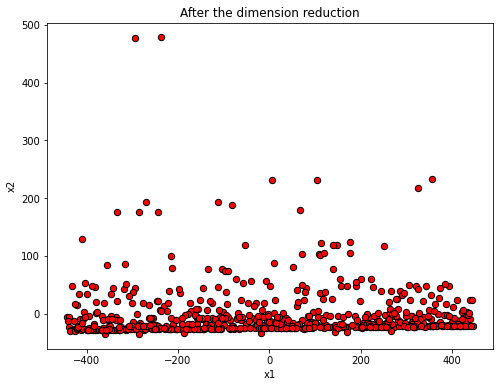

In [5]:
X_new=model.fit_transform(x_train)
Maxcomponent=model.components_
ratio=model.explained_variance_ratio_
score=model.score(x_train)
print('降维后的数据:',X_new)
print('返回具有最大方差的成分:',Maxcomponent)
print('保留主成分的方差贡献率:',ratio)
print('所有样本的log似然平均值:',score)
print('奇异值:',model.singular_values_)
print('噪声协方差:',model.noise_variance_)
g1=plt.figure(1,figsize=(8,6))
plt.scatter(X_new[:,0],X_new[:,1],c='r',cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('After the dimension reduction')
plt.show()